# Práctica 1: Aprendizaje automático

__Fecha de entrega: 27 de Marzo de 2023__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: 15__

__Nombres de los estudiantes: Diego Rojas Rodríguez__

In [ ]:
# acceso a google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `Mall_Customers.csv` que se proporciona junto con la práctica.

El conjunto de datos contiene por cada fila los datos de un préstamo que fue concedido por una empresa de crédito p2p. Las variables que caracterizan el préstamo son las siguientes:
  - `Customer ID` es el identificador del cliente
  - `Gender` es el género del cliente (Male|Female)
  - `Annual Income` son los ingresos anuales en cientos de dólares del cliente
  - `Age` es la edad del cliente
  - `Spending Score` es una puntuación asignada por el mall basada en el comportamiento del cliente y a sus gastos

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/IA2/p2/Mall_Customers.csv', index_col = 0)
print(df)

            Gender  Age  Annual Income (k$)  Spending Score (1-100)
CustomerID                                                         
1             Male   19                  15                      39
2             Male   21                  15                      81
3           Female   20                  16                       6
4           Female   23                  16                      77
5           Female   31                  17                      40
...            ...  ...                 ...                     ...
196         Female   35                 120                      79
197         Female   45                 126                      28
198           Male   32                 126                      74
199           Male   32                 137                      18
200           Male   30                 137                      83

[200 rows x 4 columns]


## 2) Análisis de los datos

### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [ ]:
df.describe().transpose() #Valores estadisticos generales de los datos (sin separar por genero ni otras variables categóricas)

count   mean        std   min    25%   50%   75%  \
Age                     200.0  38.85  13.969007  18.0  28.75  36.0  49.0   
Annual Income (k$)      200.0  60.56  26.264721  15.0  41.50  61.5  78.0   
Spending Score (1-100)  200.0  50.20  25.823522   1.0  34.75  50.0  73.0   

                          max  
Age                      70.0  
Annual Income (k$)      137.0  
Spending Score (1-100)   99.0

In [ ]:
df.corr() #Coeficientes de correlacion entre cada par de variables

Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

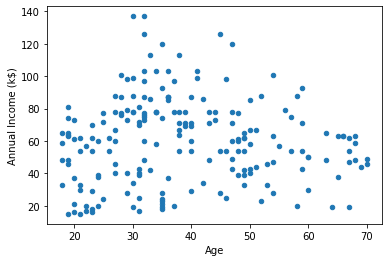

In [ ]:
df.plot.scatter(x='Age', y='Annual Income (k$)')  #Ingresos por edad

In [ ]:
df.plot.scatter(x='Annual Income (k$)', y='Spending Score (1-100)') #Gasto por ingresos

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

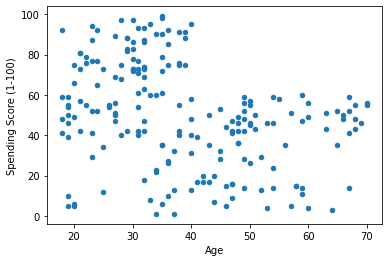

In [ ]:
df.plot.scatter(x='Age', y='Spending Score (1-100)')  #Gasto por edad


### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

In [ ]:
df.groupby('Gender').describe().transpose() #Valores estadisticos generales de cada género (la vuelvo a trasponer para que se lean los datos)
#Vemos diferencias en:
#Ingresos: Male(mean: 62.227273, std: 26.638373), Female(mean: 59.250000, std: 26.011952) de media cobran más los hombres pero la diferencia entre sueldos es mayor que entre mujeres
#Esto tambien se ve con el percentil 25%: Male(45,5%), Female(39,75) más hombres con sueldos bajos
#Gastos: Male(mean: 48.511364, std: 27.896770), Female(mean: 51.526786, std: 24.114950) conclusion similar, en este caso las mujeres gastan más de media y la diferencia en gastos entre
#hombres es mayor. Algunos hombres gastan mucho y otros muy poco (la diferencia numérica no es mucha de todos modos)
#Destacar también que el sueldo máximo lo tiene un hombre pero el gasto máximo una mujer

Gender                            Female        Male
Age                    count  112.000000   88.000000
                       mean    38.098214   39.806818
                       std     12.644095   15.514812
                       min     18.000000   18.000000
                       25%     29.000000   27.750000
                       50%     35.000000   37.000000
                       75%     47.500000   50.500000
                       max     68.000000   70.000000
Annual Income (k$)     count  112.000000   88.000000
                       mean    59.250000   62.227273
                       std     26.011952   26.638373
                       min     16.000000   15.000000
                       25%     39.750000   45.500000
                       50%     60.000000   62.500000
                       75%     77.250000   78.000000
                       max    126.000000  137.000000
Spending Score (1-100) count  112.000000   88.000000
                       mean    51.526786   48.511364
                       std     24.114950   27.896770
                       min      5.000000    1.000000
                       25%     35.000000   24.500000
                       50%     50.000000   50.000000
                       75%     73.000000   70.000000
                       max     99.000000   97.000000

In [ ]:
df.groupby('Gender').corr() #Relacion entre el género y las variables numéricas
#Se pueden ver ciertas diferencias con los valroes que no distinguían entre géneros
#La relación Anual Income - Spending Score se separa mucho de la de los datos agrupados
#Agrupados: 0.009903, Hombres: -0.023684, Mujeres: 0.047542
#En el caso de las mujeres los ingresos por edad también distan de la correlación agrupada
#Agrupados: -0.012398, Hombres: -0.092978, Mujeres: 0.059912
#El gasto por edad no cambia mucho por género
#Agrupados: -0.327227, Hombres: -0.279628, Mujeres: -0.375439

Age  Annual Income (k$)  \
Gender                                                        
Female Age                     1.000000            0.059912   
       Annual Income (k$)      0.059912            1.000000   
       Spending Score (1-100) -0.375439            0.047542   
Male   Age                     1.000000           -0.092978   
       Annual Income (k$)     -0.092978            1.000000   
       Spending Score (1-100) -0.279628           -0.023684   

                               Spending Score (1-100)  
Gender                                                 
Female Age                                  -0.375439  
       Annual Income (k$)                    0.047542  
       Spending Score (1-100)                1.000000  
Male   Age                                  -0.279628  
       Annual Income (k$)                   -0.023684  
       Spending Score (1-100)                1.000000

array([<Axes: title={'center': 'Female'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Male'}, ylabel='Frequency'>], dtype=object)

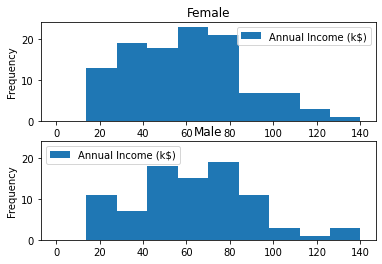

In [ ]:
df.plot.hist(column='Annual Income (k$)', by='Gender', range=[0,140], sharey=True) #Diagrama de frecuencias por genero (ajustados rangos de ejes x e y)
#Podemos ver que los salarios de mujeres entre 20k y 40k son mucho mas frecuentes que los de los hombres
#Tambien hay diferencia en los salrios de 140k donde hay un repunte en los hombres mientras que las mujeres a partir de 100k solo descienden

In [ ]:
df.plot.hist(column='Spending Score (1-100)', by='Gender', sharey=True)
#Se puede observar que las mujeres tienen un gasto concentrado entre 30 y 60 con un repunt en 70-80
#Los hombres se acumulan en 0 a 20 y 40 a 60 con un repunte significativo en 90-100
#Fijandonos en los valores del eje y vemos que muchas de las mujeres gastan entre 30 y 60 mientras que los datos de los hombres se distribuyen más (freqMaxHombre = 13 (50-60), freqMaxMujer = 17 (40-60))

array([<Axes: title={'center': 'Female'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Male'}, ylabel='Frequency'>], dtype=object)

In [ ]:
df.plot.hist(column='Age', by='Gender', range=[10,70], sharey=True)
#Por último la edad de las mujeres encuestadas es en su mayoría menor de 40 mientras que los hombres tienen una frecuecnia de edad más dispersa
#Esto puede ser relevante a la hora de sacar conclusiones o hacer predicciones puesto que la mayoría de datos de mujeres serán de mujeres entre 20 y 40 años

array([<Axes: title={'center': 'Female'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Male'}, ylabel='Frequency'>], dtype=object)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

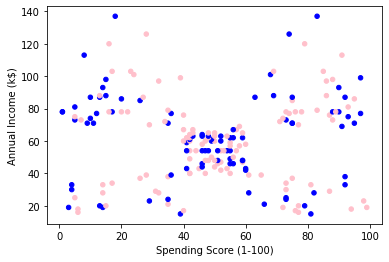

In [ ]:
dic_colors = { 'Male': 'blue', 'Female': 'pink' }
colors = df['Gender'].map(dic_colors)
df.plot.scatter(x='Spending Score (1-100)', y='Annual Income (k$)', c=colors)
#Una distribución más visual del gasto e ingresos por género
#Apreciar que entre 40 y 60 se agrupa la media, gente que independientemente del genero cobra entre 40k y 60k y gasta entre 40 y 60
#Se ve un pequeño grupo de hombres que cobra entre 70k y 100k al año pero que gasta solo entre 0 y 20
#Otra agrupación destacable de mujeres que cobran entre 70k y 80k que gastan entre 70 y 90
#Todo esto veremos si es relevante en los resultados del clustering

## 3) Preprocesar los datos

Para el clustering vamos a trabajar solamente con las variables `Annual income`, y `spending score`.

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de clientes similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo y el índice davies_boulding en función del número de clusters.

In [ ]:
#Vamos a reciclar la fucnion plot_clusters del cuadernillo
def plot_clusters(X, labels=None, centers=None):
    colors = ['r','g','b','c','y','k','m',]
    fig = plt.figure(figsize=(8,8))
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
    plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Daves boulding 2: 1.256774385118528


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


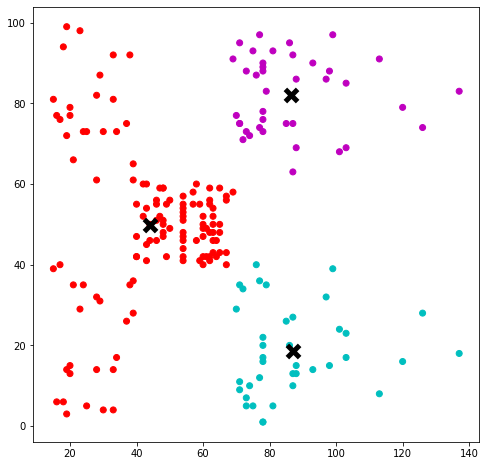

Daves boulding 3: 0.715276820248462


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


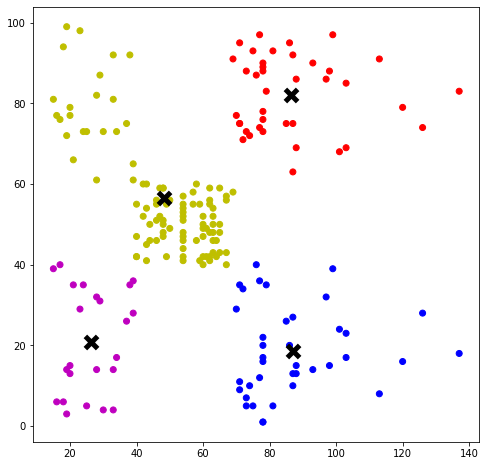

Daves boulding 4: 0.7103644068779904


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


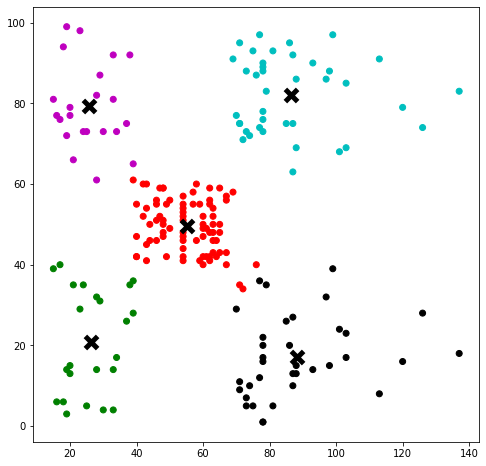

Daves boulding 5: 0.5725628995597081


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Daves boulding 6: 0.6588591430377733


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Daves boulding 7: 0.7147045165142696


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


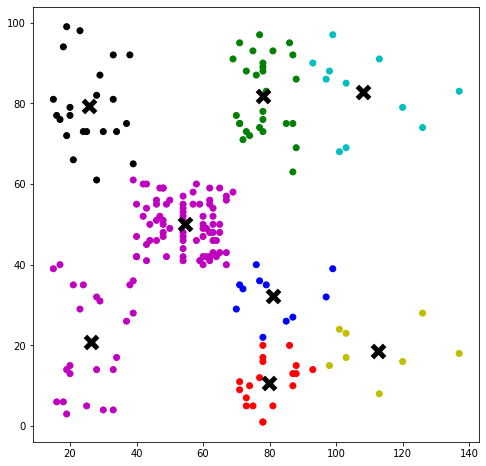

Daves boulding 8: 0.7200709017653298


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Daves boulding 9: 0.732923407821255


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Daves boulding 10: 0.752169957403384


In [ ]:
#Como hemos visto que la relación más significativa es entre ingresos y gasto vamos a dejar la columna de edad
#Empezaremos sin hacer distinción por género y luego veremos la diferencia según género
cl = df.drop(columns=['Gender', 'Age'])
db = np.zeros(9)
x = cl.to_numpy()
for i in range(2,11):
  km = KMeans(init='random', n_clusters=i)
  km.fit(x)
  plot_clusters(x, km.labels_, km.cluster_centers_)
  db[i-2]=davies_bouldin_score(x, km.labels_)
  print("Daves-Boulding {}: {}".format(i, db[i - 2]))

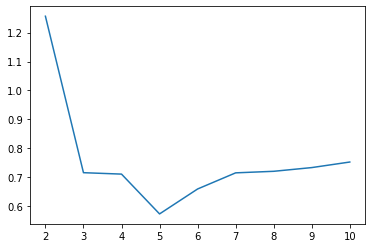

In [ ]:
#Podemos ver que la distribución con mejor índice Daves-Boulding es k = 5
plt.plot(range(2, 11), db)
#Eso siginifcia que ademas de los tres grupos que se podían ver de forma evidente hay 2 más con una agrupación significativa

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


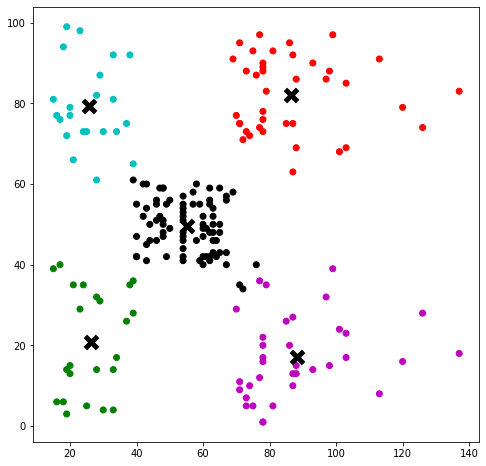

In [ ]:
km = KMeans(init='random', n_clusters=5)
km.fit(x)
plot_clusters(x, km.labels_, km.cluster_centers_)
#Podemos ver que los clusters son las 4 esquinas y el centro
#Pero esto son los datos agrupados (sin distinción por género)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


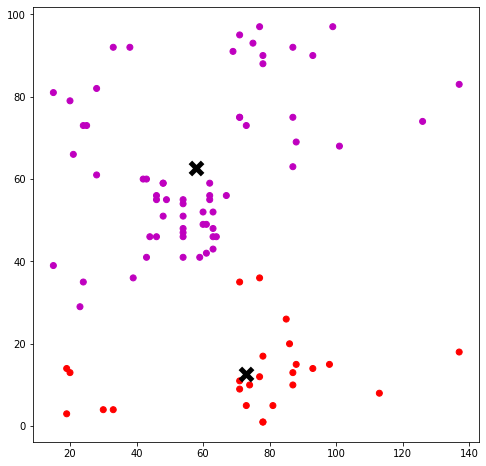

Daves-Boulding 2: 0.9555144165295497


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


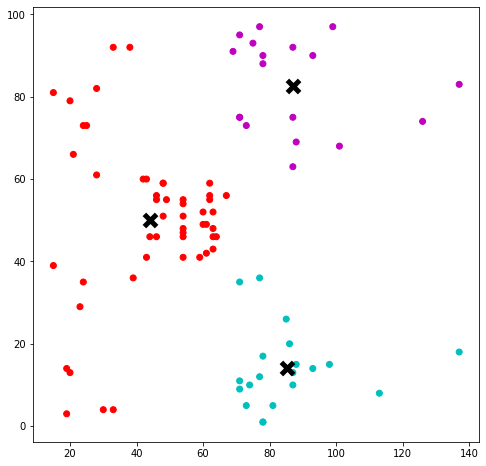

Daves-Boulding 3: 0.7137320498988354


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


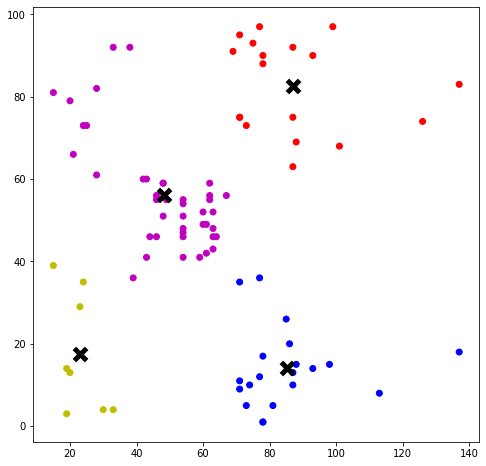

Daves-Boulding 4: 0.6705104699919676


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


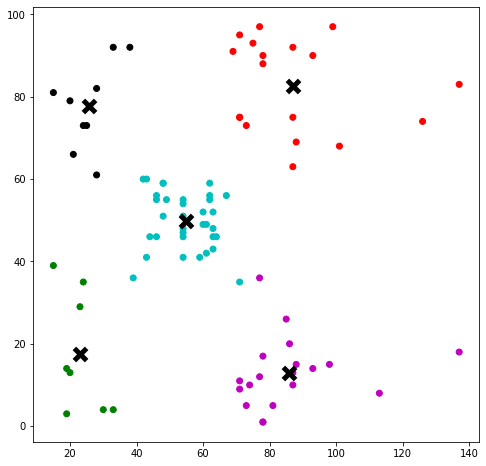

Daves-Boulding 5: 0.5460984135274909


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Daves-Boulding 6: 0.6009530729754806


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


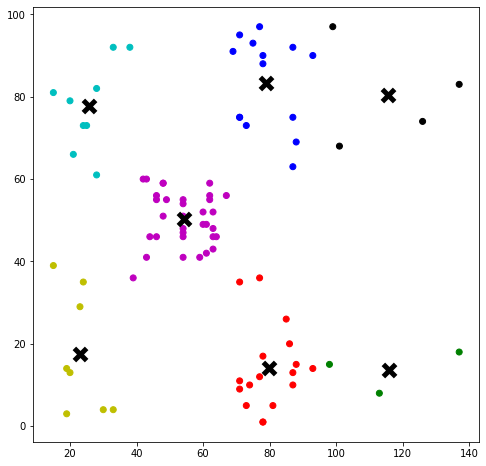

Daves-Boulding 7: 0.6695166356770965


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


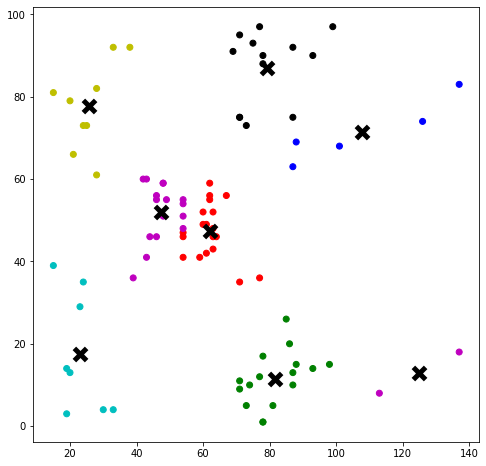

Daves-Boulding 8: 0.7348763209283115


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Daves-Boulding 9: 0.6756904836926494


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Daves-Boulding 10: 0.5808535645881018


In [ ]:
#Ahora veremos los clusters que se forman con hombres y mujeres por separado
#Repetiremos la prueba para ver cuál es el mejor número de clusters porque puede no coincidir con el de los datos agrupados
cl = df.loc[(cl['Gender'] == "Male")] #Solo tomamos los datos de hombres
cl = cl.drop(columns=['Gender', 'Age'])
db = np.zeros(9)
x = cl.to_numpy()
for i in range(2,11):
  km = KMeans(init='random', n_clusters=i)
  km.fit(x)
  plot_clusters(x, km.labels_, km.cluster_centers_)
  db[i-2]=davies_bouldin_score(x, km.labels_)
  print("Daves-Boulding {}: {}".format(i, db[i - 2]))

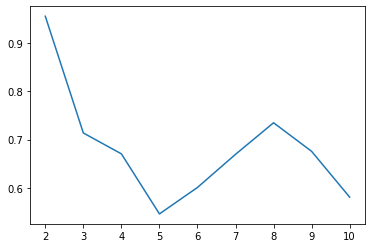

In [ ]:
plt.plot(range(2, 11), db)
#Podemos ver que de nuevo, pese a que los datos son distintos, el índice con mejor resultado (menor) es 5

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


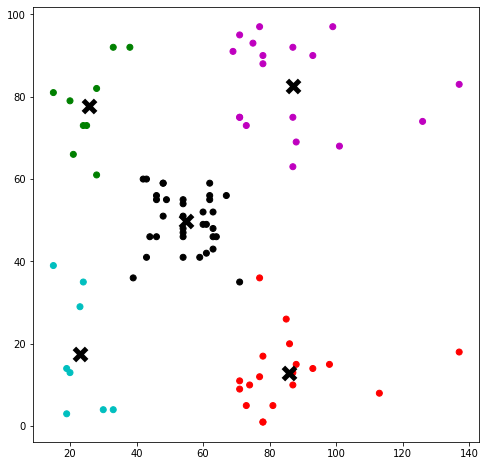

In [ ]:
km = KMeans(init='random', n_clusters=5)
km.fit(x)
plot_clusters(x, km.labels_, km.cluster_centers_)
#Auqnue el mejor índice sea 5 podemos ver que los closters generados son distintos (aunque en posiciones relativamente cercanas a las de los datos agrupados)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


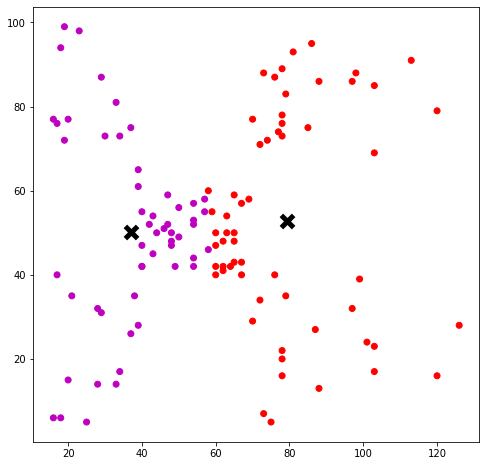

Daves-Boulding 2: 1.196430912999281


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Daves-Boulding 3: 0.7232664701400092


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Daves-Boulding 4: 0.6974172306168255


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


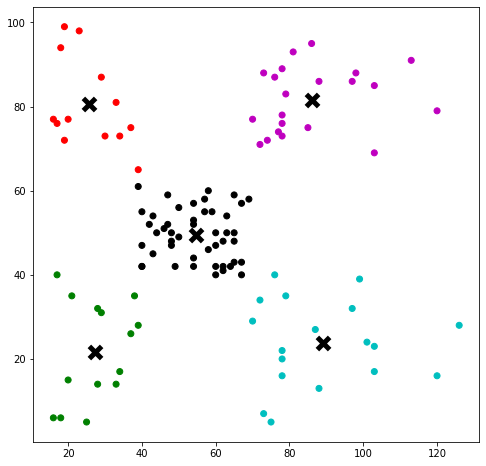

Daves-Boulding 5: 0.5905114169152739


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Daves-Boulding 6: 0.6363315742062999


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Daves-Boulding 7: 0.6638532553959291


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Daves-Boulding 8: 0.6989374056586775


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


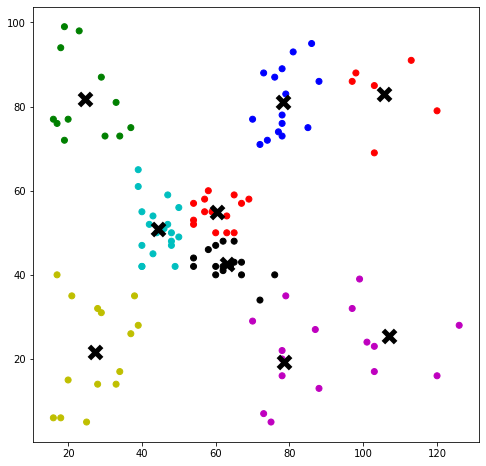

Daves-Boulding 9: 0.7113834129303159


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


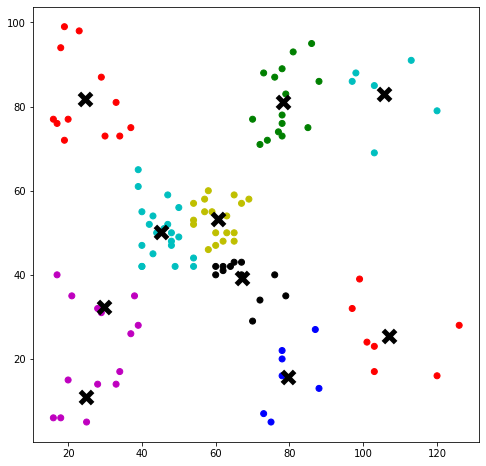

Daves-Boulding 10: 0.7116690815102794


In [ ]:
#Ahora solo queda ver la distribución para mujeres
cl = df.loc[(cl['Gender'] == "Female")] #Solo tomamos los datos de hombres
cl = cl.drop(columns=['Gender', 'Age'])
db = np.zeros(9)
x = cl.to_numpy()
for i in range(2,11):
  km = KMeans(init='random', n_clusters=i)
  km.fit(x)
  plot_clusters(x, km.labels_, km.cluster_centers_)
  db[i-2]=davies_bouldin_score(x, km.labels_)
  print("Daves-Boulding {}: {}".format(i, db[i - 2]))

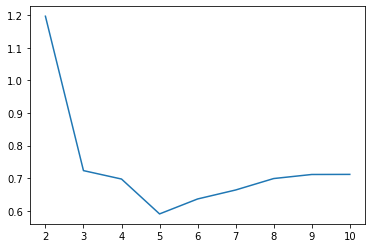

In [ ]:
plt.plot(range(2, 11), db)
#De nuevo mejor índice 5

In [ ]:
km = KMeans(init='random', n_clusters=5)
km.fit(x)
plot_clusters(x, km.labels_, km.cluster_centers_)
#Datos muy parecidos a los generados con agrupamiento y género masculino
#Con esto podemos concluir que con elalgoritmo kmeans no se aprecia una diferencia significativa por género en la distribución de gasto por ingreso
#El clustering óptimo es en todos los casos 5 clusters (4 esquinas y el centro) independientemente del género

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior. Si te han salido más de 5 elige 5 de ellos que sean bastante diferentes entre sí.

Para hacerlo estudia sus descriptores estadísticos y dales un sentido dentro del contexto del problema. ¿Qué perfil de clientes quedan en cada cluster?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar k-Means con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Datos agrupados: 


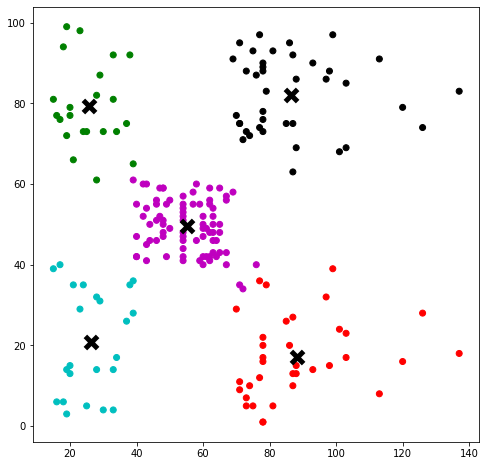

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Datos de hombres:


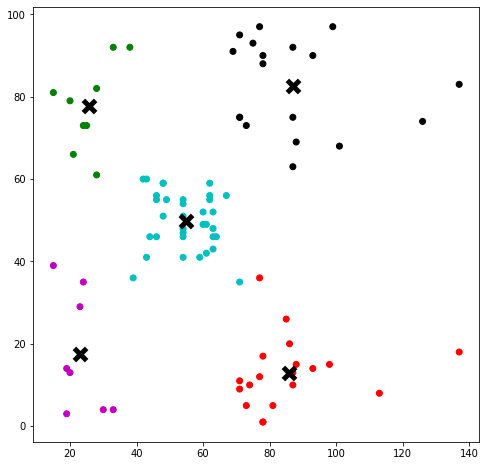

Datos de mujeres: 


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


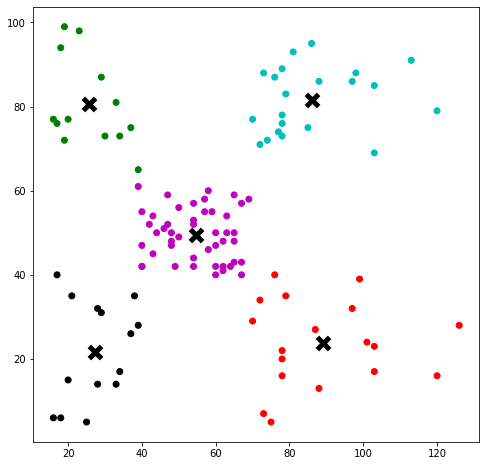

In [ ]:
cl = df.drop(columns=['Gender', 'Age']).to_numpy()
clm = df.loc[df['Gender']=='Male'].drop(columns=['Gender', 'Age']).to_numpy()
clf = df.loc[df['Gender']=='Female'].drop(columns=['Gender', 'Age']).to_numpy()
km = KMeans(init='random', n_clusters=5)
km.fit(cl)
print("Datos agrupados: ")
plot_clusters(cl, km.labels_, km.cluster_centers_)
km.fit(clm)
print("Datos de hombres:")
plot_clusters(clm, km.labels_, km.cluster_centers_)
km.fit(clf)
print("Datos de mujeres: ")
plot_clusters(clf, km.labels_, km.cluster_centers_)

In [ ]:
#Podemos observar de nuevo que no existe diferencia por género en la distribución de gasto e ingreso
#Todos tienen como clustering óptimo 5 clusters en las mismas posiciones (forma de x)
#Esto nos deja con 5 grupos o clases en las que podemos diferenciar a los consumidores
#1: Personas que gastan entre 70 y 100 pese a cobrar solo entre 10k y 40k anuales
#2: Personas que solo gastan entre 10 y 40 porque solo cobran entre 10k y 40k anuales
#3: Personas que gastan entre 40 y 60 y cobran entre 40k y 60k (este es el grupo más numeroso y parece que coincide con el centro de uan distribución normal)
#4: Personas que gastan entre 70 y 100 y cobran entre 70k y 140k anuales
#5: Persobas que gastan entre 10 y 40 pese a que cobran entre 70k y 140k anuales
#Destacar de nuevo que estos grupos no se ven alterados por el género de la persona
#Repasando los datos que vimos con la correlación en el segundo apartado
#Ingresos: Male(mean: 62.227273, std: 26.638373), Female(mean: 59.250000, std: 26.011952)
#Gastos: Male(mean: 48.511364, std: 27.896770), Female(mean: 51.526786, std: 24.114950)
#Se puede concluir que estas diferencias no son lo suficientemente significativas
#No se ha probado la diferencia por edad porque requeriría de muchas iteraciones (fijar intervalo de la menos 10 años de diferencia) y ya en la
#correlación se apreciaba que no había practicamente diferencias de gasto o ingreso por edad independientemente del género

## 6) Clustering jerárquico aglomerativo
Repite los apartados 4 y 5 usando clustering jerárquico aglomerativo.



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


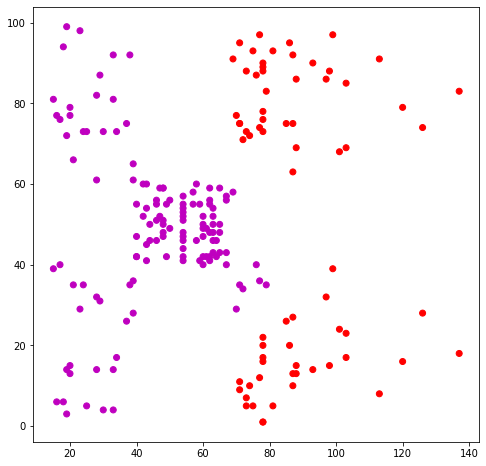

Daves-Boulding 2: 1.3734011244003579


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


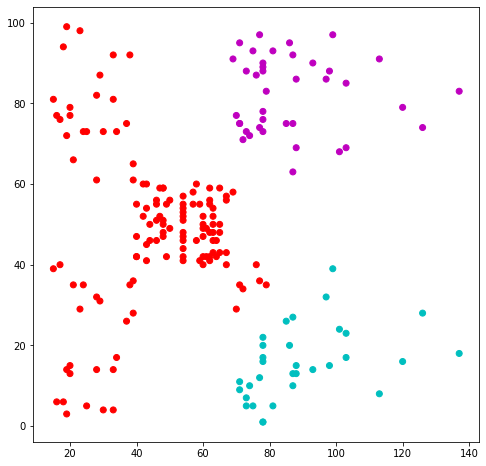

Daves-Boulding 3: 0.7068435076376502


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


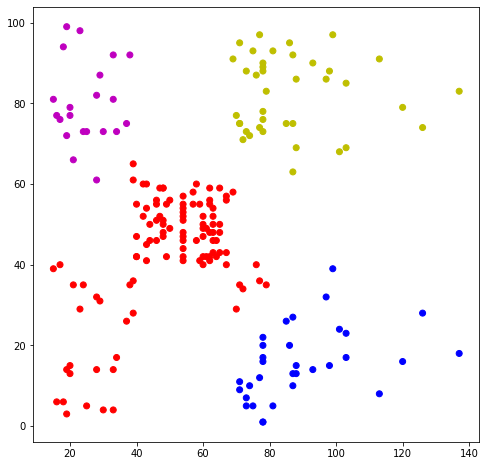

Daves-Boulding 4: 0.6712836786400213


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


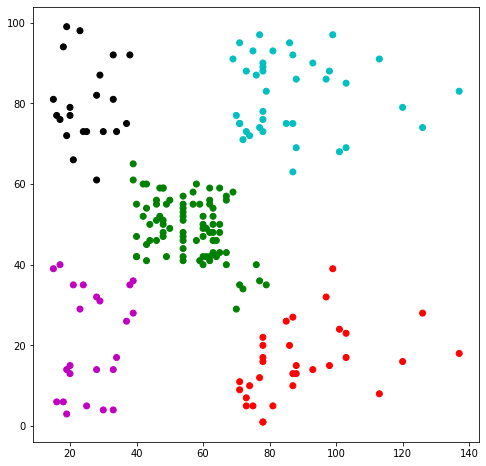

Daves-Boulding 5: 0.5782207452369454


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


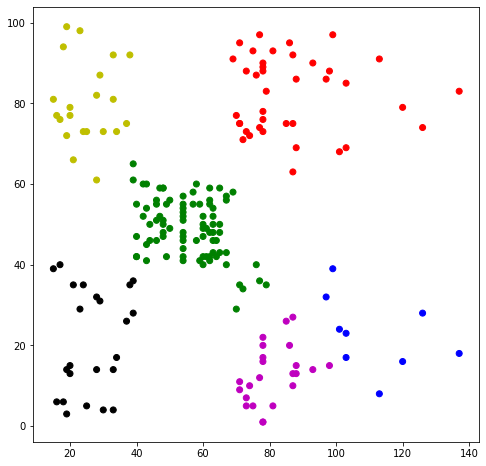

Daves-Boulding 6: 0.6436494715040276


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


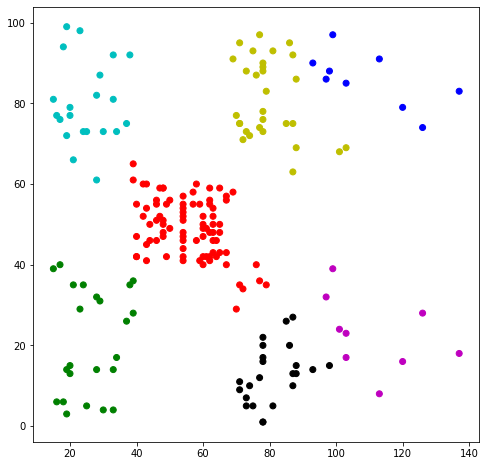

Daves-Boulding 7: 0.710473709113116


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


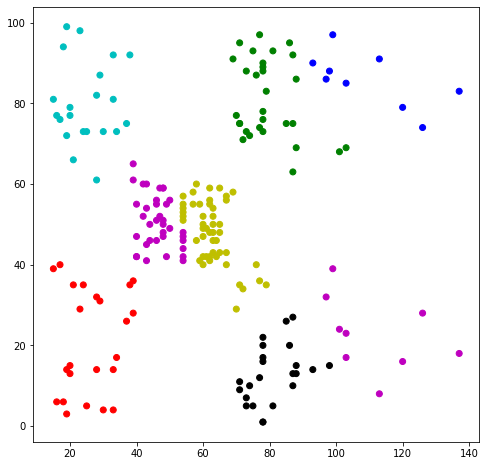

Daves-Boulding 8: 0.7730869541324268


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Daves-Boulding 9: 0.7740643491231528


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


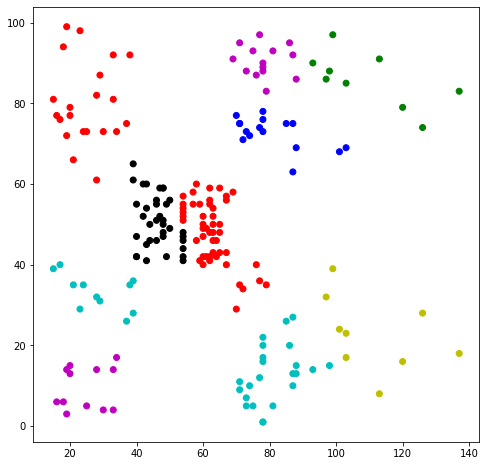

Daves-Boulding 10: 0.7679109297031743


In [ ]:
#Repetiremos el proceso anterior para datos agrupados y separados por género pero con el algoritmo jerárquico
cl = df.drop(columns=['Age', 'Gender']).to_numpy()
db = np.zeros(9)
for i in range(2, 11):
    ag = AgglomerativeClustering(n_clusters=i, linkage='ward', affinity='euclidean')
    ag.fit(cl)
    plot_clusters(cl, ag.labels_)
    db[i-2] = davies_bouldin_score(cl, ag.labels_)
    print("Daves-Boulding {}: {}".format(i, db[i - 2]))

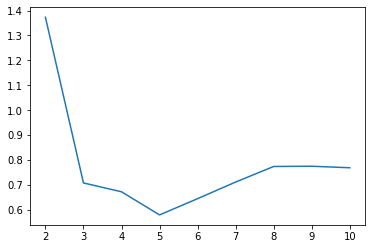

In [ ]:
plt.plot(range(2, 11), db)
#En el caso de agrupados el algoritmo jerárquico coincide en que 5 clusters es el valor de distribución optimo

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


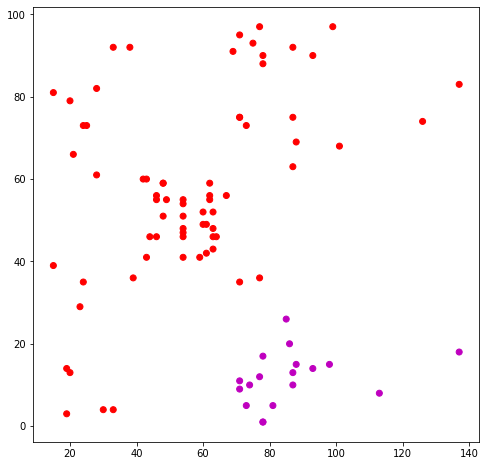

Daves-Boulding 2: 0.749779005061997


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Daves-Boulding 3: 0.7104847859516843


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


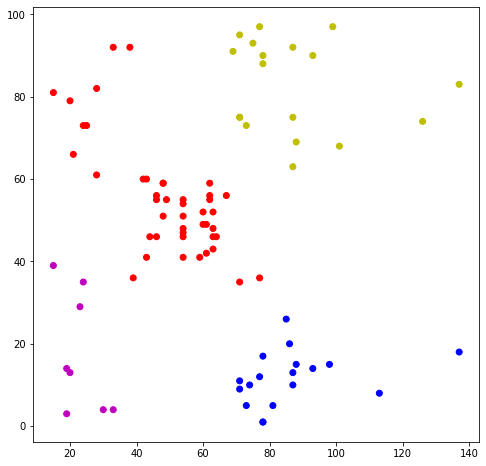

Daves-Boulding 4: 0.6753402477459675


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Daves-Boulding 5: 0.5514892870481323


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Daves-Boulding 6: 0.5111181713378371


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


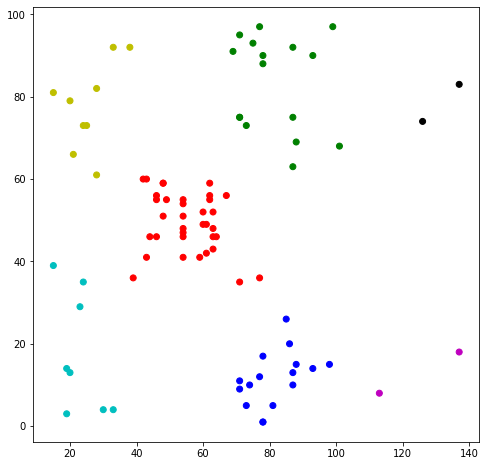

Daves-Boulding 7: 0.5174769816058697


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


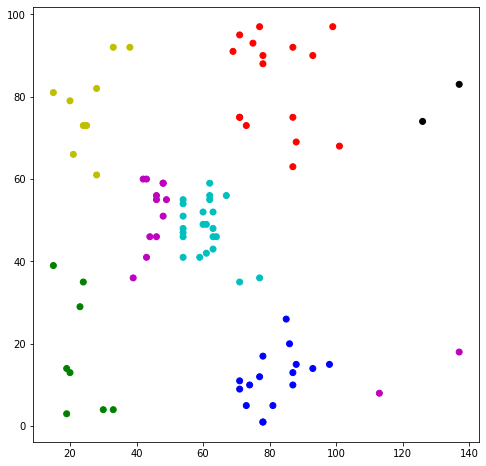

Daves-Boulding 8: 0.6104770366288482


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Daves-Boulding 9: 0.645906238934398


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Daves-Boulding 10: 0.6278517528906641


In [ ]:
clm = df.loc[(df['Gender'] == "Male")] #Solo tomamos los datos de hombres
clm = clm.drop(columns=['Gender', 'Age']).to_numpy()
db = np.zeros(9)
for i in range(2, 11):
    ag = AgglomerativeClustering(n_clusters=i, linkage='ward', affinity='euclidean')
    ag.fit(clm)
    plot_clusters(clm, ag.labels_)
    db[i-2] = davies_bouldin_score(clm, ag.labels_)
    print("Daves-Boulding {}: {}".format(i, db[i - 2]))

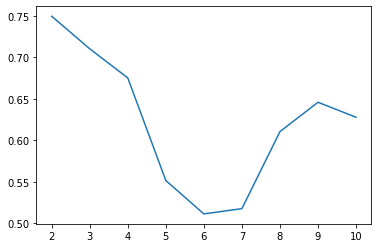

In [ ]:
plt.plot(range(2, 11), db)
#Para los hombres el algoritmo jeráriquico ahrupa mejor en 6 clusters en lugar de 5
#Esta es la primera discrepancia que encontramos por genero de los agrupados

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


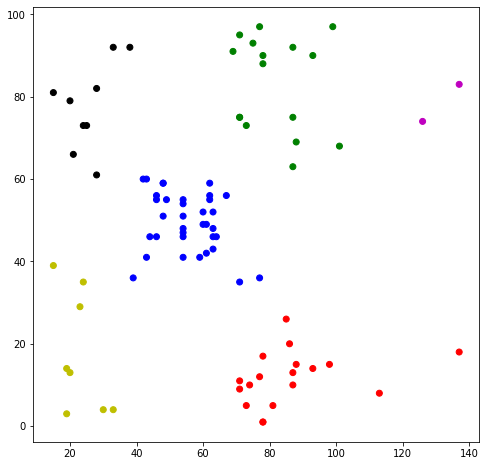

In [ ]:
ag = AgglomerativeClustering(n_clusters=6, linkage='ward', affinity='euclidean')
ag.fit(clm)
plot_clusters(clm, ag.labels_)
#Si recisamos la distribución podemos ver ha agrupado a dos hombres en la esquina superior derecha de gasto e ingreso entre 70-100
#así separándolos de los puntos verdes con los que los había unido el algoritmo kmeans
#Este nuevo cluster es muy pequeño, habría que valorar si merece la pena conseguir datos de más hombres para ver si este secotor es o no significativo

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


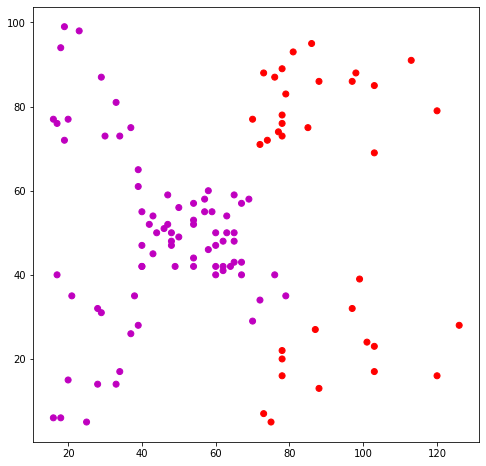

Daves-Boulding 2: 1.2435976437283238


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


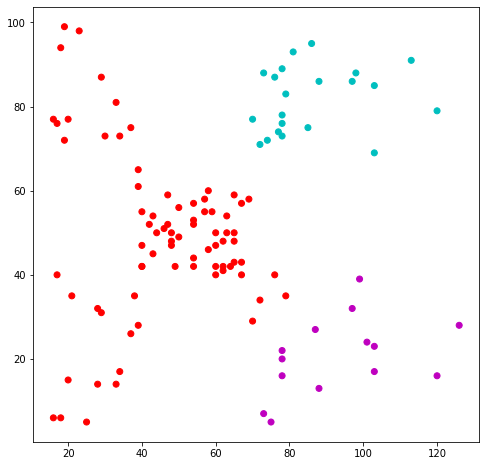

Daves-Boulding 3: 0.6931858977167843


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


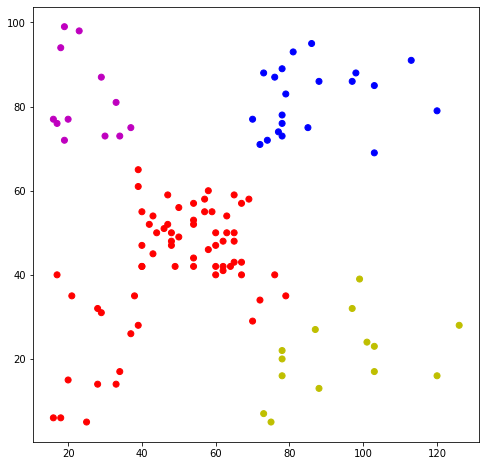

Daves-Boulding 4: 0.662176472859738


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


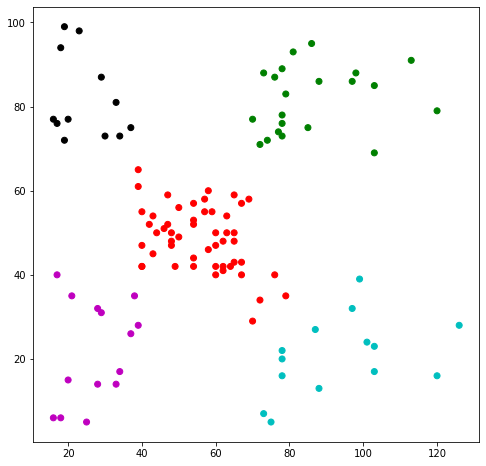

Daves-Boulding 5: 0.5900928588002661


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


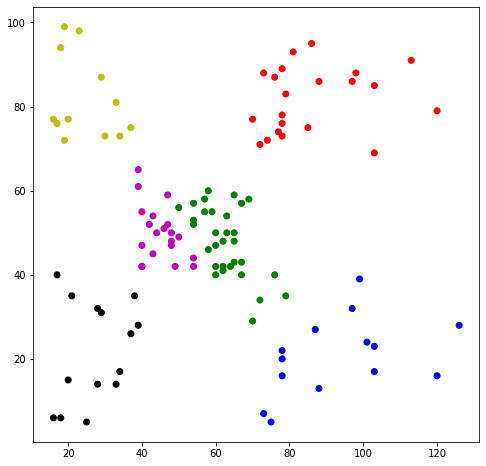

Daves-Boulding 6: 0.6741820941222567


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


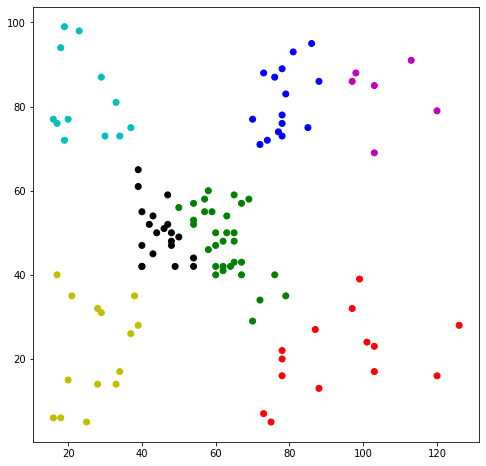

Daves-Boulding 7: 0.6922720161424437


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


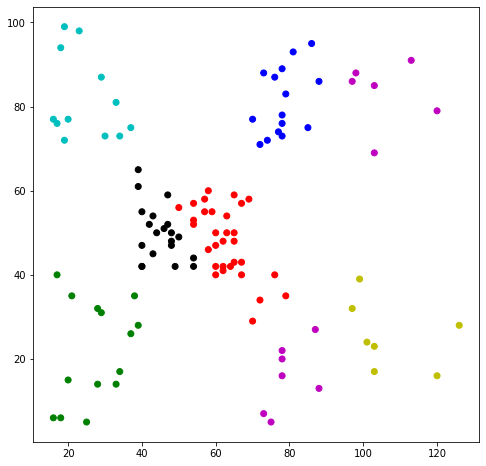

Daves-Boulding 8: 0.7000661003301997


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Daves-Boulding 9: 0.7029372198627317


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


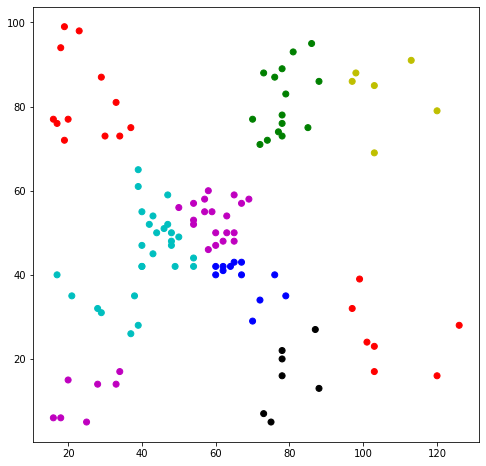

Daves-Boulding 10: 0.7161903247613404


In [ ]:
clf = df.loc[(df['Gender'] == "Female")] #Solo tomamos los datos de hombres
clf = clf.drop(columns=['Gender', 'Age']).to_numpy()
db = np.zeros(9)
for i in range(2, 11):
    ag = AgglomerativeClustering(n_clusters=i, linkage='ward', affinity='euclidean')
    ag.fit(clf)
    plot_clusters(clf, ag.labels_)
    db[i-2] = davies_bouldin_score(clf, ag.labels_)
    print("Daves-Boulding {}: {}".format(i, db[i - 2]))

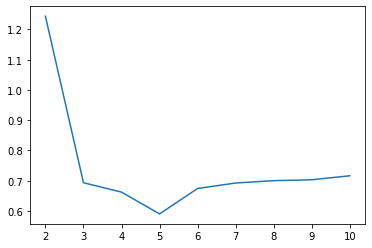

In [ ]:
plt.plot(range(2, 11), db)
#Para las mujeres coincide en 5 clusters con el algoritmo kmeans

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Datos agrupados: 


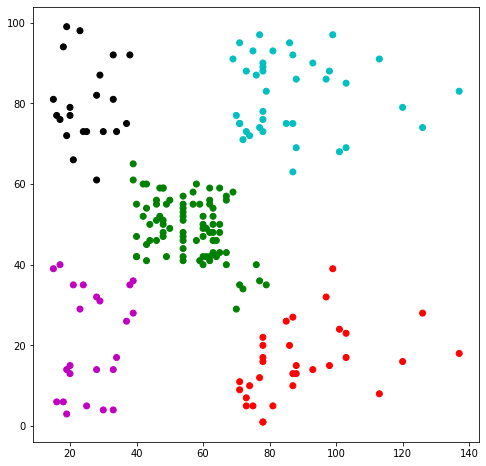

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Datos de muejeres: 


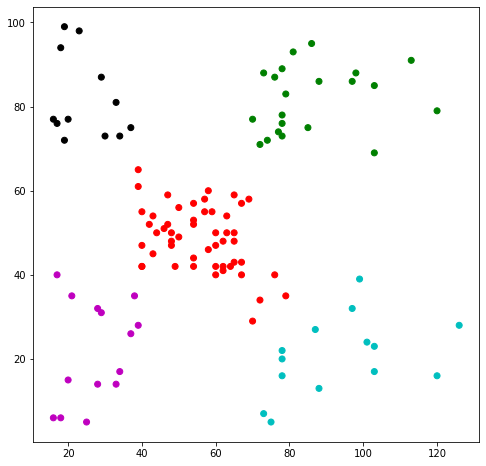

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Datos de hombres:


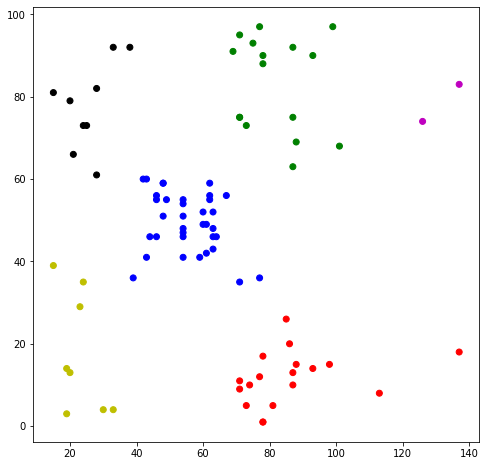

In [ ]:
#Mostramos las distribuciones óptimas según algoritmo jerárquico
ag = AgglomerativeClustering(n_clusters=5, linkage='ward', affinity='euclidean')
ag.fit(cl)
print("Datos agrupados: ")
plot_clusters(cl, ag.labels_)
ag.fit(clf)
print("Datos de muejeres: ")
plot_clusters(clf, ag.labels_)
ag = AgglomerativeClustering(n_clusters=6, linkage='ward', affinity='euclidean')
ag.fit(clm)
print("Datos de hombres:")
plot_clusters(clm, ag.labels_)

In [ ]:
#La unica diferencia significativa entre los algoritmos kmeans y jerárquico es que este último obtiene mejores valores cuando se añade
#otro cluster en la distribución de gastos e ingresos en hombres
#Este nuevo cluster sería resultado de dividir el precio "hombres con gastos entre 70 y 100 e ingresos entre 70k y 140k anuales" en
#1: Hombres con gastos entre 70 y 100 e ingresos entre 120k y 140k anuales
#2: Hombres con gastos entre 60 y 100 e ingresos entre 70k y 100k anuales
#Esta distinción podría ser relevante aunque convendría analizar a más hombres para ver que porcentaje verdaderamente entra en esta categoría 1
#Con los datos que contamos podemos prescindir de este cluster puesto que solo tiene a dos hombres y si quisieramos un algoritmo de clasificación
#eficiente solo contaríamos con los 5 clusters más poblados